In [1]:
# Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import matthews_corrcoef, classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (local path)
url = "data.csv"

# Feature names
features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP",
            "MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5",
            "MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]

dataset = pd.read_csv(url, names=features)

# Store the dataset as an array for easier processing
array = dataset.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array)

# X stores feature values
X = scaled[:, 0:22]
# Y stores "answers", the flower species / class (every row, 4th column)
Y = scaled[:, 22]

# Randomize which part of the data is training and which part is validation
validation_size = 0.25
seed = 7

# Split dataset into training set (75%) and validation set (25%)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# 10-fold cross-validation to estimate accuracy (split data into 10 parts; use 9 parts to train and 1 for test)
num_folds = 10
num_instances = len(X_train)
scoring = 'accuracy'

# Initialize KNN classifier
clf = KNeighborsClassifier()

# Use KFold cross-validation with shuffle=True
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(clf, X_train, Y_train, cv=kfold, scoring=scoring)

# Train the classifier
clf.fit(X_train, Y_train)

# Predict on the validation set
predictions = clf.predict(X_validation)

# Print results
print("KNN")
print(f"Cross-validation accuracy: {cv_results.mean()*100:.2f}% (+/- {cv_results.std()*100:.2f}%)")
print(f"Validation accuracy: {accuracy_score(Y_validation, predictions)*100:.2f}%")
print(f"Matthews correlation coefficient: {matthews_corrcoef(Y_validation, predictions)}")
print(classification_report(Y_validation, predictions))
print("Confusion Matrix:")
print(confusion_matrix(Y_validation, predictions))


KNN
Cross-validation accuracy: 88.38% (+/- 8.08%)
Validation accuracy: 97.96%
Matthews correlation coefficient: 0.9367496997597597
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.97      1.00      0.99        39

    accuracy                           0.98        49
   macro avg       0.99      0.95      0.97        49
weighted avg       0.98      0.98      0.98        49

Confusion Matrix:
[[ 9  1]
 [ 0 39]]


In [2]:
# Import all necessary libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import matthews_corrcoef, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset (local path)
url = "data.csv"

# Feature names
features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP",
            "MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5",
            "MDVP:APQ","Shimmer:DDA","NHR","HNR","status"]

dataset = pd.read_csv(url, names=features)

# Store the dataset as an array for easier processing
array = dataset.values

# X stores feature values
X = array[:, 0:16]

# Y stores "answers", the flower species / class (every row, 4th column)
Y = array[:, 16]

# Randomize which part of the data is training and which part is validation
validation_size = 0.3
seed = 7

# Split dataset into training set (70%) and validation set (30%)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# 10-fold cross-validation to estimate accuracy (split data into 10 parts; use 9 parts to train and 1 for test)
num_folds = 10
num_instances = len(X_train)

# Use the 'accuracy' metric to evaluate models (correct / total)
scoring = 'accuracy'

# Algorithms / models
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NN', MLPClassifier(solver='lbfgs', max_iter=10000)))
models.append(('NB', GaussianNB()))
models.append(('GB', GradientBoostingClassifier(n_estimators=10000)))

# Evaluate each algorithm / model
results = []
names = []
print("Scores for each algorithm:")
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(f"Accuracy: {accuracy_score(Y_validation, predictions) * 100:.2f}%")
    print(f"Matthews correlation coefficient: {matthews_corrcoef(Y_validation, predictions)}")
    print(classification_report(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print()


Scores for each algorithm:
LR
Accuracy: 83.05%
Matthews correlation coefficient: 0.4769503546099291
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58        12
         1.0       0.89      0.89      0.89        47

    accuracy                           0.83        59
   macro avg       0.74      0.74      0.74        59
weighted avg       0.83      0.83      0.83        59

[[ 7  5]
 [ 5 42]]

LDA
Accuracy: 81.36%
Matthews correlation coefficient: 0.4425302665770298
              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56        12
         1.0       0.89      0.87      0.88        47

    accuracy                           0.81        59
   macro avg       0.71      0.73      0.72        59
weighted avg       0.82      0.81      0.82        59

[[ 7  5]
 [ 6 41]]

KNN
Accuracy: 88.14%
Matthews correlation coefficient: 0.6054161897450039
              precision    recall  f1-score   support

   

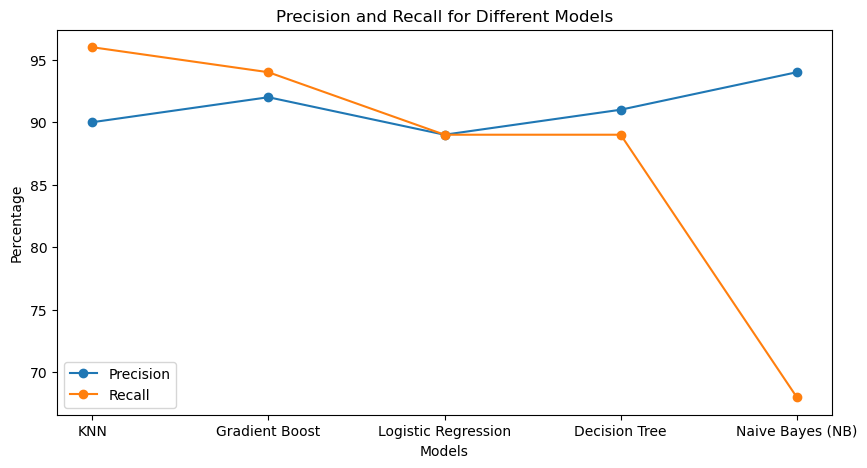

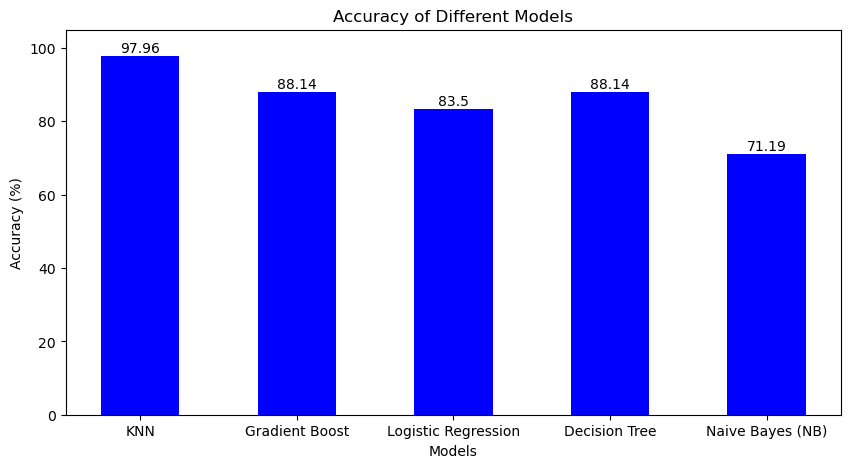

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['KNN', 'Gradient Boost', 'Logistic Regression', 'Decision Tree', 'Naive Bayes (NB)']
accuracy = [97.96, 88.14, 83.5, 88.14, 71.19]
precision = [90, 92, 89, 91, 94]
recall = [96, 94, 89, 89, 68]

# Line graph for precision and recall
plt.figure(figsize=(10, 5))

plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')

# Add text annotations for precision and recall
#for i, (p, r) in enumerate(zip(precision, recall)):
    #plt.text(i, p + 1, f'{p}', ha='center', va='bottom')
    #plt.text(i, r + 1, f'{r}', ha='center', va='bottom')

plt.title('Precision and Recall for Different Models')
plt.xlabel('Models')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Bar graph for accuracy
x = np.arange(len(models))

plt.figure(figsize=(10, 5))
bars = plt.bar(x, accuracy, color='blue', width=0.5)

# Add text annotations for accuracy
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{acc}', ha='center', va='bottom')

plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(x, models)
plt.ylim(0, 105)
plt.show()


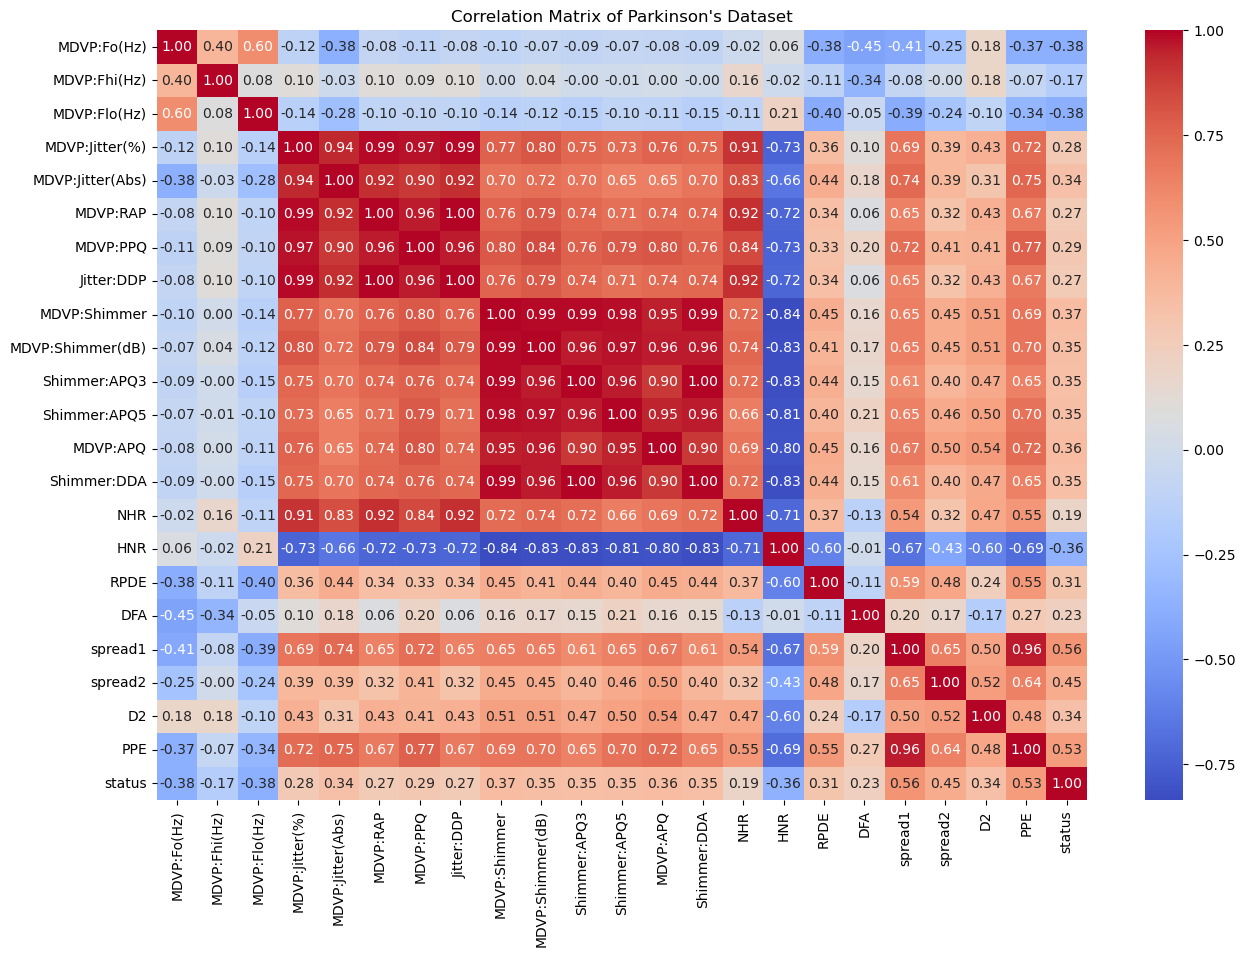

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (local path)
url = "data.csv"

# Feature names
features = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", 
            "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", 
            "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", 
            "RPDE", "DFA", "spread1", "spread2", "D2", "PPE", "status"]

# Load the dataset
dataset = pd.read_csv(url, names=features)

# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Parkinson\'s Dataset')
plt.show()
